# Problem Statement
--------------------  
Tuberculosis (TB) remains a major global health challenge, with millions of cases reported annually, particularly in low-resource settings. Early and accurate diagnosis is critical to controlling its spread and improving patient outcomes. This project focuses on leveraging machine learning techniques to analyze chest X-ray (CXR) images for the reliable classification of TB-positive cases and normal cases. By automating TB detection, the solution aims to assist healthcare professionals, particularly in areas with limited access to diagnostic resources.

### Key Objectives:  
1. Develop a robust machine learning model capable of classifying chest X-ray images as either TB-positive or normal.  
2. Enhance the diagnostic workflow by providing accurate predictions, reducing reliance on time-intensive manual interpretation.  
3. Evaluate the model's performance using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.  
4. Provide interpretable insights to ensure that healthcare professionals can trust and utilize the model's predictions in clinical decision-making.  

### Dataset link: [Tuberculosis (TB) Chest X-ray Database](https://www.kaggle.com/datasets/tawsifurrahman/tuberculosis-tb-chest-xray-dataset/data)  
  
### Approach  

1. **Import Dependencies:**  
   - Load all necessary libraries and packages, including deep learning frameworks like TensorFlow or PyTorch, and tools for data manipulation and visualization, such as NumPy, Pandas, and Matplotlib.  

2. **Load Dataset:**  
   - Retrieve the dataset, ensuring all images are organized and accessible for processing.  

3. **Preprocessing, Labeling, Reshaping   and Transformation:**   
   - Convert images to grayscale or apply RGB adjustments for consistency.  
   - Assign labels to the images (e.g., TB-positive, normal).
   - Resize and normalize the images to standard dimensions for model compatibility.
   - Convert image data into numerical format to meet model requirements  

4. **Data Visualization:**  
   - Show the categories of images in the dataset to provide an overview of the data.  

5. **Exploratory Data Analysis (EDA):**  
   - Analyze the image categories; if no categories exist, this step can be skipped.   

7. **Data Balancing:**  
   - Apply techniques such as oversampling, undersampling, or weighted loss functions to address any class imbalances.  

8. **Data Splitting:**  
   - Divide the dataset into training, validation, and testing subsets while maintaining class proportions.  

9. **Deep Learning (DL) Model Application:**  
   - Develop and train a Convolutional Neural Network (CNN) for image classification.  
   - Use transfer learning with pre-trained models like ResNet, VGG, or EfficientNet for improved performance.  

10. **Accuracy Evaluation:**  
    - Assess the model’s performance using accuracy, sensitivity, specificity, and AUC-ROC metrics.  
    - Perform cross-validation to ensure model robustness.  
    
11. **Model Deployment:**  
    - Export the trained model into a format suitable for deployment (e.g., TensorFlow SavedModel, ONNX, or PyTorch script).  
    - Deploy the model using a web framework such as Flask, FastAPI, or Django for real-time predictions.  
    - Host the application on a cloud platform (e.g., AWS, Azure, or Google Cloud) or a local server.  
    - Develop an intuitive user interface for healthcare professionals to upload images and receive predictions with visual explanations (e.g., Grad-CAM outputs).  

12. **Documentation:**  
    - Create comprehensive documentation covering the following aspects:  
      - **Project Overview:** Goals, scope, and the problem statement.  
      - **Data Preparation:** Steps for dataset handling, preprocessing, and augmentation.  
      - **Model Details:** Architecture, hyperparameters, and training process.  
      - **Evaluation Metrics:** Explanation of metrics used for performance assessment.  
      - **Usage Guide:** Instructions for using the deployed application, including sample inputs and outputs.  
      - **Deployment Details:** Description of the deployment pipeline and infrastructure.  


### Results  
The project aims to deliver a robust and interpretable TB detection system, enabling healthcare professionals to enhance diagnostic accuracy, efficiency, and clinical decision-making with actionable insights.  

# About Dataset
--------------------  

**Data Description**  
The dataset comprises chest X-ray images of TB-positive and normal cases, curated by a team of researchers and healthcare professionals.  

### Features:  
- **Total Images**:  
  - **TB-Positive**: 700 publicly accessible images (+2800 available via agreement).  
  - **Normal**: 3500 images.  
- **Source**:  
  - National Library of Medicine (Montgomery and Shenzhen datasets).  
  - Belarus Tuberculosis Portal.  
  - NIAID TB Portal Program.  
  - RSNA Pneumonia Detection Challenge Dataset.  

**Target Variable**:  
- Binary Classification:  
  - **1**: TB-Positive.  
  - **0**: Normal.  

This dataset is a valuable resource for advancing automated TB detection using chest X-ray imaging, which could significantly aid in addressing the global TB burden.  


# Image Processing and Model Building Steps:

* **Import Dependencies:** Load all necessary libraries and packages.  
* **Load Dataset:** Retrieve the dataset to be used in the project.  
* **Preprocessing, Labeling, Reshaping   and Transformation:**  Assign labels to data, apply grayscale conversion or color adjustments (e.g., RGB correction), and reshape data dimensions to meet model requirements, and Convert image data into numerical format for model compatibility.    
* **Data Visualization:** Show the categories of images in the dataset.  
* **Exploratory Data Analysis (EDA):** Analyze the categories of images; if images are not categorized, skip this step.  
* **Data Balancing:** Apply techniques to ensure balanced classes for effective model training.  
* **Data Splitting:** Divide the dataset into training and testing subsets.  
* **Deep Learning (DL) Model Application:** Develop and train a Convolutional Neural Network (CNN) for image analysis.  
* **Accuracy Evaluation:** Assess the model’s performance using accuracy and other relevant metrics.  
* **Model Deployment:** Deploy the model using Streamlit to create an interactive web application for predictions.  
* **Documentation:** Provide a detailed guide covering project objectives, data preparation, model architecture, evaluation metrics, deployment steps, and usage instructions.



## Import Libraries



In [ ]:
# Import necessary libraries
import os
from pathlib import Path
import cv2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tqdm import tqdm

## Load and Explore Dataset

In [ ]:
# Mount Google Drive if the dataset is stored there
from google.colab import drive
drive.mount('/content/drive')

# Define dataset paths
data_dir = Path('''/content/drive/MyDrive/AI, ML, DS/Project/Health care/Preprocessing/Dataset/Tuberculosis (TB)/TB_Chest_Radiography_Database''')
normal_dir = data_dir / 'Normal'
tb_dir = data_dir / 'Tuberculosis'

# Verify dataset paths
print(f"Normal images path: {normal_dir}")
print(f"Tuberculosis images path: {tb_dir}")

# Verify dataset structure
print(f"Number of normal images: {len(os.listdir(normal_dir))}")
print(f"Number of tuberculosis images: {len(os.listdir(tb_dir))}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Normal images path: /content/drive/MyDrive/AI, ML, DS/Project/Health care/Preprocessing/Dataset/Tuberculosis (TB)/TB_Chest_Radiography_Database/Normal
Tuberculosis images path: /content/drive/MyDrive/AI, ML, DS/Project/Health care/Preprocessing/Dataset/Tuberculosis (TB)/TB_Chest_Radiography_Database/Tuberculosis
Number of normal images: 600
Number of tuberculosis images: 711


## Preprocessing, Labeling, Reshaping   and Transformation
1. **Set image preprocessing parameters**: Define `image_size` (e.g., 256x256) and initialize arrays for images and labels.  
2. **Load images in grayscale**: Read "Normal" and "TB" images from their respective directories in grayscale format.  
3. **Resize images to a uniform size**: Resize all images to `image_size` (e.g., 256x256).  
4. **Label images**: Assign `0` for "Normal" and `1` for "Tuberculosis" and store them in the labels array.  
5. **Normalize pixel values**: Convert image data to a NumPy array and normalize pixel values to the range [0, 1].  
6. **Verify processed data**: Check the shapes of the images and labels arrays to ensure correctness.  

In [ ]:
# Image preprocessing parameters
image_size = 256  # Resize all images to 256x256

# Initialize arrays to hold images and labels
images = []
labels = []

# Load Normal images
for file_name in tqdm(os.listdir(normal_dir), desc="Processing Normal Images"):
    file_path = os.path.join(normal_dir, file_name)
    image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (image_size, image_size))
    images.append(image)
    labels.append(0)

# Load TB images
for file_name in tqdm(os.listdir(tb_dir), desc="Processing Tuberculosis Images"):
    file_path = os.path.join(tb_dir, file_name)
    image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (image_size, image_size))
    images.append(image)
    labels.append(1)

Processing Tuberculosis Images: 100%|██████████| 711/711 [00:36<00:00, 19.33it/s]


In [ ]:
# Convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)
print(f"Images shape: {images.shape}")
print(f"Labels shape: {labels.shape}")

Images shape: (1311, 256, 256)
Labels shape: (1311,)


In [ ]:
# Reshape images to include channel dimension
image_size = 256  # Resize all images to 256x256
images = images.reshape(-1, image_size, image_size, 1)

# Normalize pixel values to [0, 1]
images = images.astype('float32') / 255.0

# Check the shape of images
print(f"Original shape of images: {images.shape}")

Original shape of images: (1311, 256, 256, 1)


In [ ]:
images[0]

array([[[0.01176471],
        [0.01568628],
        [0.01176471],
        ...,
        [0.05882353],
        [0.06666667],
        [0.04313726]],

       [[0.01176471],
        [0.01176471],
        [0.01176471],
        ...,
        [0.01568628],
        [0.01960784],
        [0.01568628]],

       [[0.01176471],
        [0.01176471],
        [0.01176471],
        ...,
        [0.01568628],
        [0.01568628],
        [0.01568628]],

       ...,

       [[0.01568628],
        [0.01568628],
        [0.01568628],
        ...,
        [0.02745098],
        [0.02745098],
        [0.02745098]],

       [[0.01568628],
        [0.01568628],
        [0.01568628],
        ...,
        [0.03137255],
        [0.03137255],
        [0.02745098]],

       [[0.01176471],
        [0.01176471],
        [0.01176471],
        ...,
        [0.02745098],
        [0.02745098],
        [0.02352941]]], dtype=float32)

## Visualize Samples

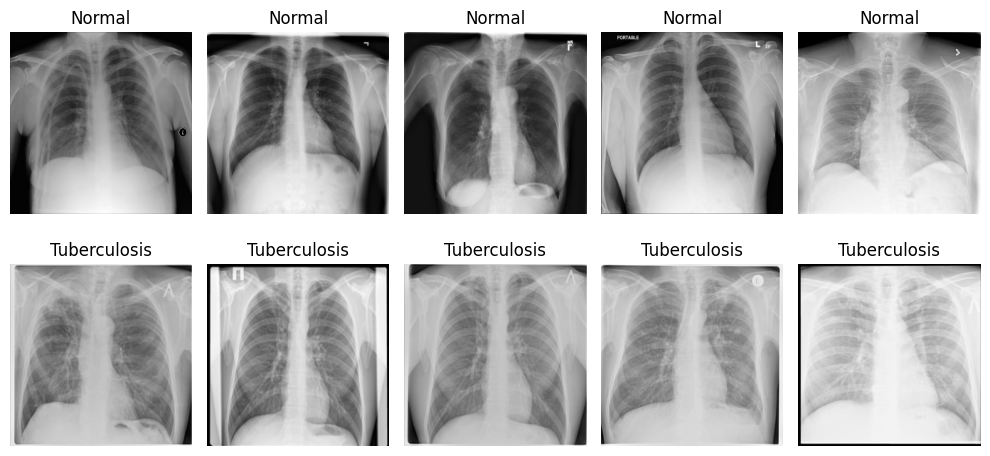

In [ ]:
# Plot a few samples from both classes
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[labels == 0][i], cmap='gray')
    plt.title("Normal")
    plt.axis('off')

    plt.subplot(2, 5, i + 6)
    plt.imshow(images[labels == 1][i], cmap='gray')
    plt.title("Tuberculosis")
    plt.axis('off')
plt.tight_layout()
plt.show()

## Exploratory Data Analysis (EDA)

          Case Type  Count
0        Normal (0)    600
1  Tuberculosis (1)    711


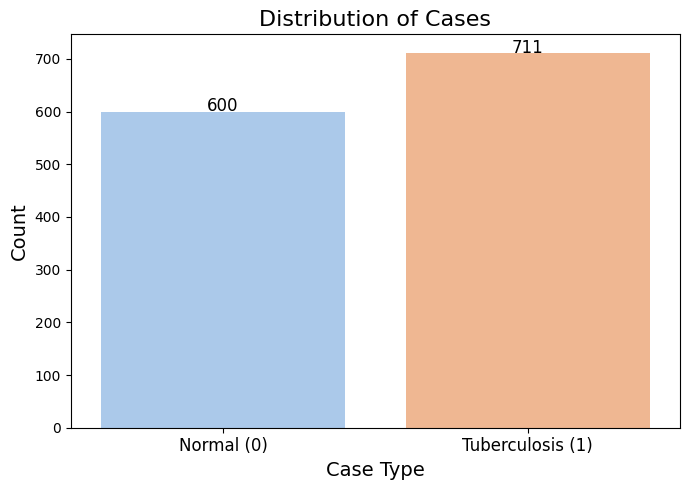

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Count occurrences of each label (0 for Normal, 1 for TB)
cases_count = np.unique(labels, return_counts=True)
case_labels = ['Normal (0)', 'Tuberculosis (1)']

# Create a DataFrame for easier use with hue
import pandas as pd
data = pd.DataFrame({'Case Type': case_labels, 'Count': cases_count[1]})
print(data)

# Plot with hue and disable legend
plt.figure(figsize=(7, 5))
sns.barplot(data=data, x='Case Type', y='Count', palette='pastel', hue='Case Type', dodge=False, legend=False)

# Customize the plot
plt.title('Distribution of Cases', fontsize=16)
plt.xlabel('Case Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)

# Annotate bar heights
for i, count in enumerate(cases_count[1]):
    plt.text(i, count + 1, str(count), ha='center', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


## Balance Training Data using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle
import numpy as np

# Check the shape of images
print(f"Original shape of images: {images.shape}")

# Flatten the images for SMOTE
n_samples = images.shape[0]
images_flat = images.reshape(n_samples, -1)  # Flatten to 2D

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled_flat, y_resampled = smote.fit_resample(images_flat, labels)

# Reshape resampled data back to original image format
X_resampled = X_resampled_flat.reshape(-1, image_size, image_size, 1)

# Shuffle the resampled dataset
X_resampled, y_resampled = shuffle(X_resampled, y_resampled, random_state=42)

# Print balanced dataset information
print(f"Balanced training set size: {X_resampled.shape[0]}")
print(f"Balanced training set shape: {X_resampled.shape}")
print(f"Balanced labels distribution: {np.unique(y_resampled, return_counts=True)}")


Original shape of images: (1311, 256, 256, 1)
Balanced training set size: 1422
Balanced training set shape: (1422, 256, 256, 1)
Balanced labels distribution: (array([0, 1]), array([711, 711]))


### Visualize Class Distribution

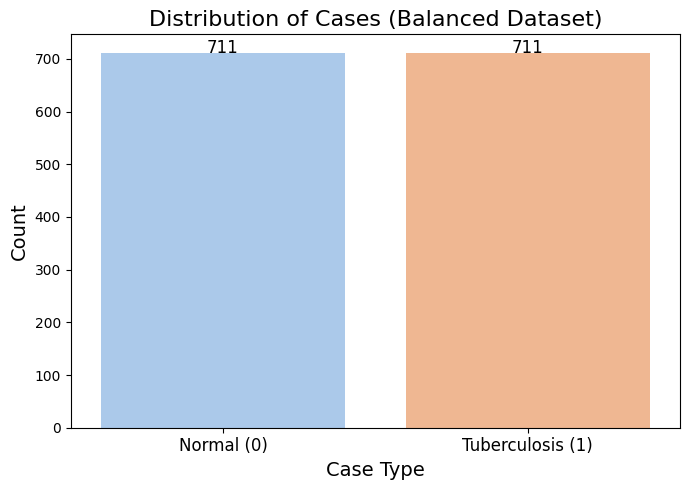

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Count occurrences of each label (0 for Normal, 1 for TB)
cases_count = np.unique(y_resampled, return_counts=True)
case_labels = ['Normal (0)', 'Tuberculosis (1)']

# Create a DataFrame for plotting
data = pd.DataFrame({'Case Type': case_labels, 'Count': cases_count[1]})

# Plot the bar chart
plt.figure(figsize=(7, 5))
sns.barplot(data=data, x='Case Type', y='Count', palette='pastel', hue='Case Type', dodge=False, legend=False)

# Customize the plot
plt.title('Distribution of Cases (Balanced Dataset)', fontsize=16)
plt.xlabel('Case Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)

# Annotate bar heights
for i, count in enumerate(data['Count']):
    plt.text(i, count + 1, str(count), ha='center', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


## Split Data into Train and Test Sets

In [ ]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set size: 995
Testing set size: 427
Training set shape: (995, 256, 256, 1)
Testing set shape: (427, 256, 256, 1)


## Define the CNN Model

In [ ]:
# Define CNN architecture
cnn = Sequential([
    # Convolutional Layer 1
    Conv2D(16, (3, 3), activation='relu', input_shape=(image_size, image_size, 1)),
    MaxPooling2D((2, 2)),

    # Convolutional Layer 2
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Convolutional Layer 3
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Flatten Layer
    Flatten(),

    # Dense Layer
    Dense(64, activation='relu'),
    Dropout(0.5),

    # Output Layer
    Dense(1, activation='sigmoid')
])

# Compile the model
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 16)        │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │       3,686,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,709,825 (14.15 MB)

 Trainable params: 3,709,825 (14.15 MB)

 Non-trainable params: 0 (0.00 B)

## Train the CNN

In [ ]:
# Train the model
model = cnn.fit(
    X_resampled, y_resampled,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32
)

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 124s 3s/step - accuracy: 0.6064 - loss: 0.6828 - val_accuracy: 0.8712 - val_loss: 0.3438
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - accuracy: 0.8814 - loss: 0.3074 - val_accuracy: 0.9391 - val_loss: 0.1873
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.9068 - loss: 0.2248 - val_accuracy: 0.9368 - val_loss: 0.1862
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.9218 - loss: 0.2007 - val_accuracy: 0.9485 - val_loss: 0.1406
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 115s 3s/step - accuracy: 0.9207 - loss: 0.1878 - val_accuracy: 0.9696 - val_loss: 0.0850
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - accuracy: 0.9513 - loss: 0.1290 - val_accuracy: 0.9813 - val_loss: 0.0478
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.9617 - loss: 0.0875 - val_accuracy: 0.9789 - val_loss: 0.0564
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.9799 - loss: 0.0852 - val_accuracy: 0.9906 - v

## Evaluate the Model

14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 714ms/step - accuracy: 0.9907 - loss: 0.0402
Test Loss: 0.0383
Test Accuracy: 0.9883
Test Accuracy in %: 98.8290


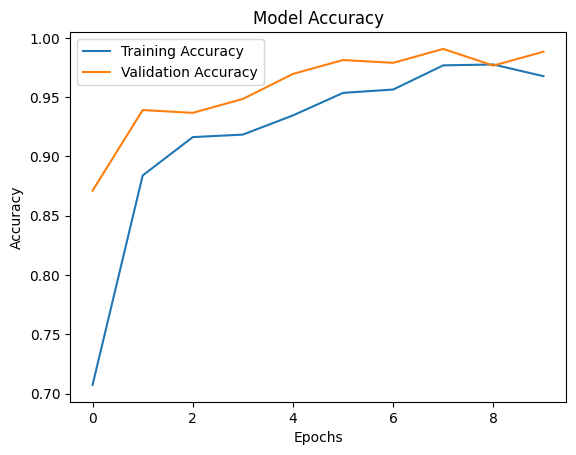

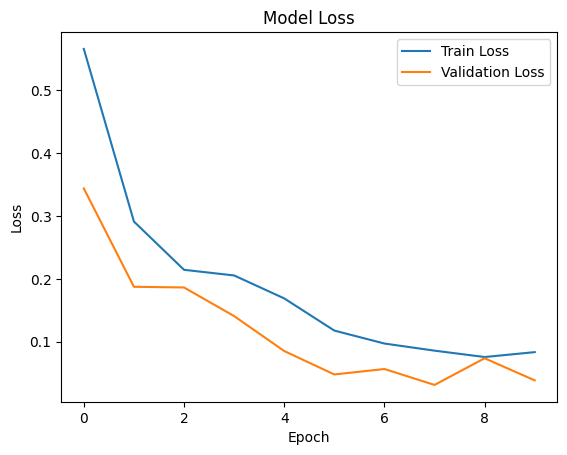

ADVANCED TESTING METRICS:
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 597ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       211
           1       0.99      0.99      0.99       216

    accuracy                           0.99       427
   macro avg       0.99      0.99      0.99       427
weighted avg       0.99      0.99      0.99       427

Confusion Matrix:
[[208   3]
 [  2 214]]


In [ ]:
# Evaluate on test data
loss, accuracy = cnn.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Accuracy in %: {accuracy*100:.4f}")

# Plot training history
plt.plot(model.history['accuracy'], label='Training Accuracy')
plt.plot(model.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(model.history['loss'], label='Train Loss')
plt.plot(model.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Advanced Testing Metrics
print('ADVANCED TESTING METRICS:')
from sklearn.metrics import classification_report, confusion_matrix

# Get predictions
predictions = cnn.predict(X_test, batch_size=32)
predicted_labels = (predictions > 0.5).astype('int32')

# Print classification report and confusion matrix
print('\nClassification Report:')
print(classification_report(y_test, predicted_labels))
print("Confusion Matrix:")
print(confusion_matrix(y_test, predicted_labels))

## Testing

Saving Tuberculosis-2.png to Tuberculosis-2.png


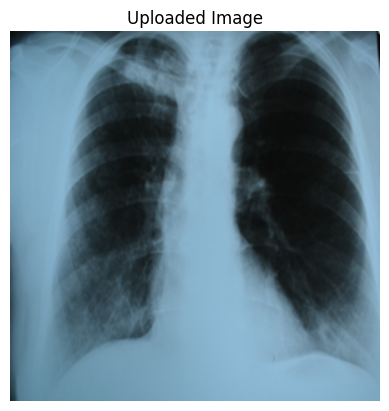

Shape of processed image batch: (1, 256, 256, 1)


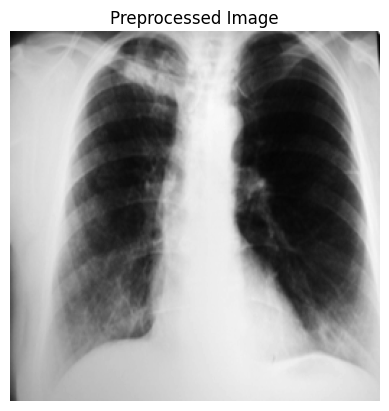

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step
Prediction: Normal


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np
from google.colab import files

# Step 1: Upload and Load the Image
uploaded = files.upload()  # This will prompt file upload dialog
image_path = list(uploaded.keys())[0]  # Get the uploaded file name
images = Image.open(image_path)  # Load the image using PIL

# Display the uploaded image
plt.imshow(images)
plt.axis('off')  # Hide axes for better view
plt.title("Uploaded Image")
plt.show()

# Step 2: Image Preprocessing
# Define the desired image size
image_size = 256

# Check if the image is already grayscale
if images.mode != 'L':  # 'L' mode indicates grayscale
    images = images.convert('L')  # Convert to grayscale if necessary

# Convert PIL image to NumPy array and resize
image = np.array(images)
image = cv2.resize(image, (image_size, image_size))  # Resize to 256x256

# Normalize and reshape the image to match the CNN input format
image = image.astype('float32') / 255.0  # Normalize pixel values to [0, 1]
images = np.expand_dims(image, axis=0)  # Add batch dimension (1, 256, 256)
images = np.expand_dims(images, axis=-1)  # Add channel dimension (1, 256, 256, 1)

# Check the shape of the processed image
print(f"Shape of processed image batch: {images.shape}")

# Step 3: Display Preprocessed Image
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title("Preprocessed Image")
plt.show()

# Step 4: Prediction using the Trained CNN
# Assuming `cnn` is your trained model
# Replace X_test with the single preprocessed image for testing
predictions = cnn.predict(images, batch_size=1)  # Predict for one image
predicted_label = (predictions > 0.5).astype('int32')  # Convert probabilities to binary (0 or 1)

# Step 5: Display Prediction Result
if predicted_label[0][0] == 0:
    print("Prediction: Normal")
else:
    print("Prediction: TB")


## Model Deployment.

1. **Save the trained model** into `keras` files after training.
2. **Load the model** from the `keras` files for deployment.
3. Use the loaded model for predictions.

### Steps:
1. **Save the model after training**: After training your model your data, save both the model and the scaler into `.keras` files.
2. **Load them back for deployment**: In your deployment environment (or script), load these `.keras` files and use them for predictions.

### Save the Model

In [ ]:
cnn

<Sequential name=sequential, built=True>

In [ ]:
# Save the model
cnn.save('tb_cnn_model.keras')  # Save in native Keras format
# cnn.save('my_cnn_model.h5')   # Save in HDF5 format (optional)
print("Model saved!")

Model saved!


In [ ]:
# Load the model
import tensorflow.keras.models as keras
loaded_cnn = keras.models.load_model('tb_cnn_model.keras')

AttributeError: module 'tensorflow.keras.models' has no attribute 'models'

### Deployment Source code

Saving Tuberculosis-4.png to Tuberculosis-4.png


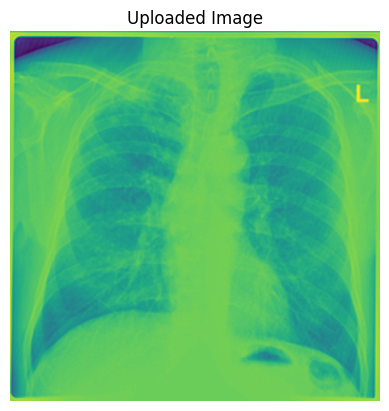

Shape of processed image batch: (1, 256, 256, 1)


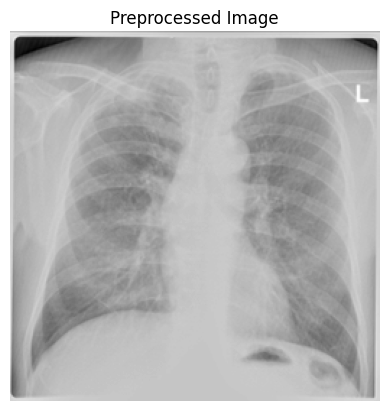

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Prediction: TB


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np
from google.colab import files

# Step 1: Upload and Load the Image
uploaded = files.upload()  # This will prompt file upload dialog
image_path = list(uploaded.keys())[0]  # Get the uploaded file name
images = Image.open(image_path)  # Load the image using PIL

# Display the uploaded image
plt.imshow(images)
plt.axis('off')  # Hide axes for better view
plt.title("Uploaded Image")
plt.show()

# Step 2: Load the model
loaded_cnn = keras.models.load_model('tb_cnn_model.keras')

# Step 3: Image Preprocessing
# Define the desired image size
image_size = 256

# Check if the image is already grayscale
if images.mode != 'L':  # 'L' mode indicates grayscale
    images = images.convert('L')  # Convert to grayscale if necessary

# Convert PIL image to NumPy array and resize
image = np.array(images)
image = cv2.resize(image, (image_size, image_size))  # Resize to 256x256

# Normalize and reshape the image to match the CNN input format
image = image.astype('float32') / 255.0  # Normalize pixel values to [0, 1]
images = np.expand_dims(image, axis=0)  # Add batch dimension (1, 256, 256)
images = np.expand_dims(images, axis=-1)  # Add channel dimension (1, 256, 256, 1)

# Check the shape of the processed image
print(f"Shape of processed image batch: {images.shape}")

# Step 4: Display Preprocessed Image
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title("Preprocessed Image")
plt.show()

# Step 5: Prediction using the Trained CNN
# Assuming `cnn` is your trained model
# Replace X_test with the single preprocessed image for testing
predictions = loaded_cnn.predict(images, batch_size=1)  # Predict for one image
predicted_label = (predictions > 0.5).astype('int32')  # Convert probabilities to binary (0 or 1)

# Step 6: Display Prediction Result
if predicted_label[0][0] == 0:
  print("The result indicates the patient is **Normal.** No immediate action is required, but maintaining regular health check-ups is advised. 😊")
else:
  print("The result indicates the patient is **Affected by Pulmonary Tuberculosis  Disorder (TB).** Immediate medical intervention and consultation with a healthcare provider are strongly recommended. 😔")

## Streeamlit Deployement

In [ ]:
import streamlit as st
from PIL import Image
import numpy as np
import tensorflow.keras.models as keras
import cv2

# App Title
st.title("Pulmonary Tuberculosis Disorder (TB)")

# Image Upload Section
uploaded_file = st.file_uploader("Upload Chest X-ray Image", type=["png", "jpg", "jpeg"])

if uploaded_file:
    # Display the uploaded image
    st.image(uploaded_file, caption="Uploaded Image", use_column_width=True)

    # Diagnosis Button
    if st.button('**Diagnose**', use_container_width=True, key="TB_Diagnosis"):
        # Proceed with backend logic
        st.write("Processing and diagnosing... Please wait.")


# Backend processing for the uploaded image
if uploaded_file:
    # Load the image using PIL
    image = Image.open(uploaded_file)

    model_folder = r'./Model/'  # Use relative or absolute path to the Model folder
    model_path = os.path.join(model_folder, 'my_cnn_model.keras')

    # Load pre-trained CNN model
    try:
        loaded_cnn = keras.models.load_model(model_path)
    except Exception as e:
        st.error(f"Error loading model. Ensure the model file is present at '{model_path}'. {e}")
        st.stop()

    # Preprocess the image
    image_size = 256
    if image.mode != 'L':  # Convert to grayscale if needed
        image = image.convert('L')

    # Convert to NumPy array, resize, normalize, and add batch dimensions
    image_np = np.array(image)
    image_np = cv2.resize(image_np, (image_size, image_size))
    image_np = image_np.astype('float32') / 255.0  # Normalize pixel values
    image_np = np.expand_dims(image_np, axis=0)  # Batch dimension
    image_np = np.expand_dims(image_np, axis=-1)  # Channel dimension

    # Prediction
    try:
        predictions = loaded_cnn.predict(image_np, batch_size=1)
        predicted_label = (predictions > 0.5).astype('int32')  # Convert probabilities to binary (0 or 1)
    except Exception as e:
        st.error(f"Error during model prediction: {e}")
        st.stop()

    # Display results
    if predicted_label[0][0] == 0:
        st.success("The result indicates the patient is **Normal**. No immediate action is required. 😊")
    else:
        st.error("The result indicates the patient is **Affected by Pulmonary Tuberculosis Disorder (TB)**. Immediate medical intervention is strongly recommended. 😔")


In [ ]:
import streamlit as st
from PIL import Image
import numpy as np
import cv2
import keras

# Title and File Uploader
st.title("Pulmonary Tuberculosis Disorder (TB)")
st.image("tb_image.jpg", caption="Pulmonary Tuberculosis Awareness", use_column_width=True)  # Replace with a relevant image if available
uploaded_file = st.file_uploader("Upload a Chest X-Ray Image", type=["jpg", "jpeg", "png"])

# Diagnosis Button
if st.button('**Diagnose**', use_container_width=True, key="Cancer Disorders"):
    if uploaded_file is None:
        st.warning("Please upload a valid chest X-ray image.")
    else:
        # Process the uploaded image
        # Load and preprocess the image
        image = Image.open(uploaded_file)
        st.image(image, caption="Uploaded Chest X-Ray", use_column_width=True)
        st.write("Processing the image...")

        try:
          # Load the model (update with your correct file paths)
          model_folder = r'./Model/'  # Use relative or absolute path to the Model folder
          model_path = os.path.join(model_folder, 'my_cnn_model.keras')
        except Exception as e:
          st.error(f"Error loading model. Ensure the model file is present at '{model_path}'. {e}")
          st.stop()

        # Load pre-trained CNN model
        try:
            loaded_model = keras.models.load_model(model_path)
        except Exception as e:
            st.error(f"Error loading model. Ensure the model file is present at'{model_path}'. {e}")
            st.stop()

        try:
          # Convert image to grayscale
          if image.mode != 'L':
              image = image.convert('L')  # Convert to grayscale

          # Resize and normalize the image
          image_size = 256
          image_array = np.array(image)
          image_array = cv2.resize(image_array, (image_size, image_size))
          image_array = image_array.astype('float32') / 255.0
          image_array = np.expand_dims(image_array, axis=(0, -1))  # Shape (1, 256, 256, 1)

          # Display the preprocessed image
          st.image(image_array[0, :, :, 0], caption="Preprocessed Image", use_column_width=True, clamp=True)

        except Exception as e:
          st.error(f"An error occurred during processing: {e}")

        try:
            # Make a prediction
            prediction = loaded_model.predict(image_array)
            predicted_label = (prediction > 0.5).astype(int)[0, 0]
        except Exception as e:
            st.error(f"Error loading model. Please check if the model is installed. {e}")
            st.stop()

        # Display the result
        if predicted_label == 0:
            st.success("The result indicates the patient is **Normal.** No immediate action is required, but maintaining regular health check-ups is advised. 😊")
        else:
            st.error("The result indicates the patient is **Affected by Pulmonary Tuberculosis Disorder (TB).** Immediate medical intervention is strongly recommended. 😔")



# procedure
### **1. Import Dependencies**
Essential libraries are imported:
- **`numpy` and `pandas`**: For numerical computations and data manipulation.
- **`cv2`**: For image reading and preprocessing.
- **`Pathlib`**: To handle filesystem paths.
- **`Seaborn` and `Matplotlib`**: For visualizations.
- **`skimage.io`**: To read images in different formats.
- **`SMOTE` (from `imblearn`)**: For oversampling to balance datasets.
- **`train_test_split`**: To split data into training and testing subsets.

---

### **2. Load Dataset**
The dataset structure:
- Data is stored in a directory containing separate folders for "Normal" and "Tuberculosis" images.
- Paths for each folder are defined:
  ```python
  normaldir = '/path/to/Normal'
  tbdir = '/path/to/Tuberculosis'
  ```

---

### **3. Labeling, Preprocessing, and Reshaping**
#### **Reference Code 1**
1. **Iterating over directories**:
   - Read each image in the "Normal" and "Tuberculosis" folders.
   - Convert images to grayscale.
   - Resize to a uniform size (`256x256`).
   - Store the images and labels (0 for normal, 1 for TB).

2. **Reference Code 2**:
   - A different approach:
     - Images are resized to `(28x28)`.
     - Ensures 3-channel images (even if grayscale) using `np.dstack`.
     - Images are normalized to [0, 1] by dividing by 255.
     - Labels are assigned as strings (`'normal'` or `'Tuberculosis'`).

---

### **4. Data Visualization**
- Display image samples using Matplotlib.
- The code groups images by their label, selects a few samples, and plots them in a grid.

---

### **5. Exploratory Data Analysis (EDA)**
- **Counting Labels**: Visualize the distribution of normal and TB images using bar plots.  
  Example:
  ```python
  plt.bar(values.index, values.values)
  ```

---

### **6. Data Transformation**
- Convert images and labels to NumPy arrays for compatibility with machine learning frameworks.
- For CNNs, reshape images to include a color channel dimension (`[n_samples, height, width, channels]`).

---

### **7. Data Balancing**
SMOTE (Synthetic Minority Oversampling Technique) is used to balance the classes.  
Example:
```python
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, Y)
```
Oversampling ensures that the model does not favor the majority class.

---

### **8. Data Splitting**
- **`train_test_split`**: Divides data into training and testing sets (70-30 split).
- Normalizes image pixel values to the range [0, 1] for better numerical stability.

---

### **9. Deep Learning (DL) Model Application**
The Convolutional Neural Network (CNN) architecture:
1. **Input Layer**: Accepts images of shape `(256, 256, 1)`.
2. **Convolutional Layers**:
   - Use `3x3` filters and ReLU activation to extract features.
   - Each layer is followed by MaxPooling to reduce dimensions.
3. **Flatten Layer**: Converts 2D feature maps into 1D vectors.
4. **Dense Layer**: Fully connected layer with 64 neurons and ReLU activation.
5. **Dropout Layer**: Prevents overfitting by randomly dropping 50% of neurons during training.
6. **Output Layer**: Single neuron with sigmoid activation for binary classification.

---

### Key Techniques Highlighted:
- **Image Preprocessing**: Resizing, normalization, and grayscale conversion.
- **Data Balancing**: Addressing class imbalance using SMOTE.
- **CNN Design**: Utilizing convolution, pooling, and dense layers for feature extraction and classification.
- **EDA & Visualization**: Understanding the dataset distribution.